## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re
import random
from sklearn.model_selection import KFold

 

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score

from sklearn.ensemble import BaggingRegressor, StackingRegressor, VotingRegressor

from numpy import mean
import scipy
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
available_ip = pd.read_csv('available_input_corr.csv')
available_ip = available_ip.drop(available_ip.columns[0], axis=1)
available_op = pd.read_csv('available_output_corr.csv')
available_op = available_op.drop(available_op.columns[0], axis = 1)
available_ip

,Year,Month,Count,average_relative_hummidity,daily_mean_celsius,Country_Belgium,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,2010,1,54.0,62.6,8.1,1,0,0,0,0,0,0,0,0,0,0,0
1,2010,2,54.0,48.8,8.3,1,0,0,0,0,0,0,0,0,0,0,0
2,2010,3,54.0,52.7,10.2,1,0,0,0,0,0,0,0,0,0,0,0
3,2010,4,14.0,54.1,12.1,1,0,0,0,0,0,0,0,0,0,0,0
4,2010,5,14.0,59.5,14.8,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2022,5,21.0,59.5,14.8,0,0,0,0,0,0,0,0,0,1,0,0
1832,2022,6,21.0,66.7,17.6,0,0,0,0,0,0,0,0,0,1,0,0
1833,2022,7,21.0,56.2,19.5,0,0,0,0,0,0,0,0,0,1,0,0
1834,2022,8,21.0,73.3,19.2,0,0,0,0,0,0,0,0,0,1,0,0


## Feature Engineering using Lasso Regression to Remove Less Significant Features

### Converting features and label dataframe to arrays

In [3]:

features_array = available_ip.values
label_array = available_op.values

### Function to perform 5-fold Cross validation for Lasso Regression for selecting penalty parameter 

In [4]:
def calculate_mse_stddev_penalty_lasso(penalty_parameters) : 

    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    mean_sqaure_error_penalty = []
    standard_deviation_penalty = []

    for penalty in penalty_parameters : 
        lasso_model = linear_model.Lasso(alpha = 1 / (2 * penalty))
        
        mean_sqaure_error_fold = []
        for train_index, test_index in k_fold_split_function.split(features_array):
            X_train, X_test = features_array[train_index], features_array[test_index]
            y_train, y_test = label_array[train_index], label_array[test_index]
            lasso_model.fit(X_train, y_train)
            predictions = lasso_model.predict(X_test)
            
            mean_sqaure_error_fold.append(mean_squared_error(y_test, predictions))

        mean_sqaure_error_penalty.append(np.array(mean_sqaure_error_fold).mean())
        standard_deviation_penalty.append(np.array(mean_sqaure_error_fold).std())
        
    return mean_sqaure_error_penalty, standard_deviation_penalty


### Testing Lasso model for different penalty parameters

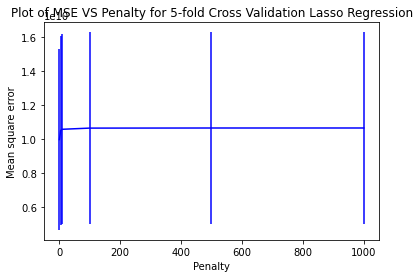

In [5]:
penalty_parameters = [1, 5, 10, 100, 500, 1000]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

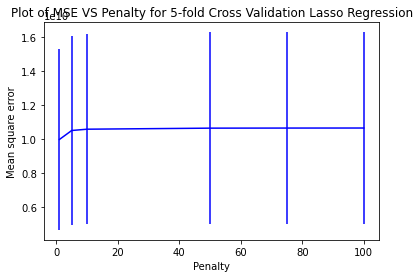

In [6]:
penalty_parameters =  [1, 5, 10, 50, 75, 100]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

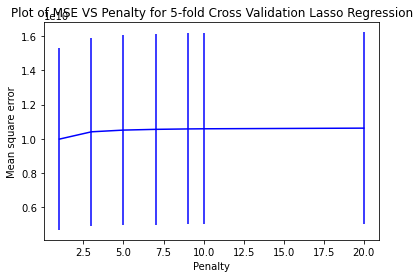

In [7]:
penalty_parameters = [1, 3, 5, 7, 9, 10, 20]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

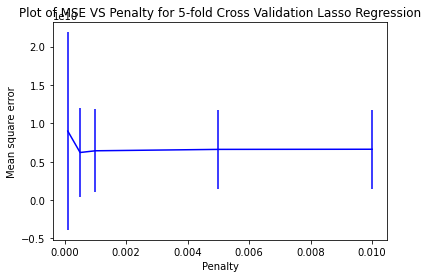

In [8]:
penalty_parameters = [0.0001, 0.0005, 0.001, 0.005, 0.01]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

### Getting the name of insignificant features using the ideal penalty parameter range confirmed from above experiment

In [9]:
feature_names = list(available_ip.columns.values)
feature_names.insert(0, 'Penalty')
feature_names.insert(1, 'Intercept')

In [10]:
penalty_parameters = [0.0001, 0.0005, 0.001, 0.005, 0.01]

In [11]:
random.seed(123)
lasso_model_dictionary = {}
X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2)
lasso_model_params_df = pd.DataFrame(columns = feature_names)
lasso_model_equation_df = pd.DataFrame(columns = ['Penalty', 'Model Equation'])
for penalty in penalty_parameters:
    lasso_model = Lasso(alpha = 1 / (2 * penalty))
    lasso_model.fit(X_Train, y_Train)
    
    model_dict = {}
    model_dict['Penalty'] = penalty
    model_dict['Intercept'] = [np.around(lasso_model.intercept_, decimals = 3)]
    for i in range(2,19) :
        model_dict[feature_names[i]] = [np.around(lasso_model.coef_[i-2], decimals = 3)]
    
    lasso_model_params_df = lasso_model_params_df.append(model_dict, ignore_index = True)
    
    model_eq_dict = {}
    model_eq_dict['Penalty'] = penalty
    equation_string = ''
    for i in range(2,19) :
        coeff = np.around(lasso_model.coef_[i-2], decimals = 3)
        if coeff != 0 : 
            equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '
    
    equation_string += '(' + str(np.around(lasso_model.intercept_, decimals = 3)) + ')'
    model_eq_dict['Model Equation'] = equation_string
    
    lasso_model_equation_df = lasso_model_equation_df.append(model_eq_dict, ignore_index = True)
    
    lasso_model_dictionary[penalty] = lasso_model

lasso_model_params_df = lasso_model_params_df.style.applymap(lambda x:'white-space:nowrap')
display(lasso_model_params_df)

lasso_model_equation_df = lasso_model_equation_df.style.set_properties(**{'text-align': 'left'})
lasso_model_equation_df = lasso_model_equation_df.applymap(lambda x:'white-space:nowrap')
display(lasso_model_equation_df)

,Penalty,Intercept,Year,Month,Count,average_relative_hummidity,daily_mean_celsius,Country_Belgium,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,0.000100,[array([2284952.625])],[-1142.681],[0.0],[520.588],[-0.0],[3907.79],[-0.0],[0.0],[0.0],[-0.0],[-0.0],[-0.0],[-0.0],[899.647],[-0.0],[-0.0],[367909.385],[0.0]
1,0.000500,[array([1960355.17])],[-969.123],[230.669],[-273.946],[-88.468],[4123.347],[-22943.091],[25026.405],[11369.571],[0.0],[-0.0],[-0.0],[-0.0],[78427.409],[-23426.872],[-14715.177],[443038.676],[40823.678]
2,0.001000,[array([1794515.139])],[-881.86],[339.454],[-480.223],[-122.126],[4146.896],[-32799.918],[34552.7],[18439.507],[0.0],[-4917.987],[-4931.929],[-0.0],[88953.868],[-31587.993],[-21100.135],[453449.887],[48428.48]
3,0.005000,[array([1644904.402])],[-801.314],[423.327],[-663.455],[-145.801],[4167.332],[-45158.308],[38376.691],[20067.922],[0.0],[-15753.585],[-14364.568],[-3760.011],[93624.277],[-42430.827],[-30354.725],[458060.731],[50525.535]
4,0.010000,[array([1626854.51])],[-791.491],[433.555],[-685.392],[-148.754],[4170.071],[-46874.982],[38646.104],[20074.008],[0.0],[-17292.076],[-15734.967],[-4672.831],[93992.16],[-43973.156],[-31708.126],[458416.84],[50580.855]


,Penalty,Model Equation
0,0.000100,(-1142.681) * Year + (520.588) * Count + (3907.79) * daily_mean_celsius + (899.647) * Country_Spain + (367909.385) * Country_UK + ([2284952.625])
1,0.000500,(-969.123) * Year + (230.669) * Month + (-273.946) * Count + (-88.468) * average_relative_hummidity + (4123.347) * daily_mean_celsius + (-22943.091) * Country_Belgium + (25026.405) * Country_France + (11369.571) * Country_Germany + (78427.409) * Country_Spain + (-23426.872) * Country_Switzerland + (-14715.177) * Country_UAE + (443038.676) * Country_UK + (40823.678) * Country_US + ([1960355.17])
2,0.001000,(-881.86) * Year + (339.454) * Month + (-480.223) * Count + (-122.126) * average_relative_hummidity + (4146.896) * daily_mean_celsius + (-32799.918) * Country_Belgium + (34552.7) * Country_France + (18439.507) * Country_Germany + (-4917.987) * Country_Netherlands + (-4931.929) * Country_Poland + (88953.868) * Country_Spain + (-31587.993) * Country_Switzerland + (-21100.135) * Country_UAE + (453449.887) * Country_UK + (48428.48) * Country_US + ([1794515.139])
3,0.005000,(-801.314) * Year + (423.327) * Month + (-663.455) * Count + (-145.801) * average_relative_hummidity + (4167.332) * daily_mean_celsius + (-45158.308) * Country_Belgium + (38376.691) * Country_France + (20067.922) * Country_Germany + (-15753.585) * Country_Netherlands + (-14364.568) * Country_Poland + (-3760.011) * Country_Portugal + (93624.277) * Country_Spain + (-42430.827) * Country_Switzerland + (-30354.725) * Country_UAE + (458060.731) * Country_UK + (50525.535) * Country_US + ([1644904.402])
4,0.010000,(-791.491) * Year + (433.555) * Month + (-685.392) * Count + (-148.754) * average_relative_hummidity + (4170.071) * daily_mean_celsius + (-46874.982) * Country_Belgium + (38646.104) * Country_France + (20074.008) * Country_Germany + (-17292.076) * Country_Netherlands + (-15734.967) * Country_Poland + (-4672.831) * Country_Portugal + (93992.16) * Country_Spain + (-43973.156) * Country_Switzerland + (-31708.126) * Country_UAE + (458416.84) * Country_UK + (50580.855) * Country_US + ([1626854.51])


## Dropping insignificant features

In [12]:
available_ip.drop('Country_Italy', inplace=True, axis=1)
available_ip.drop('Country_Netherlands', inplace=True, axis=1)
available_ip.drop('Country_Poland', inplace=True, axis=1)
available_ip.drop('Country_Portugal', inplace=True, axis=1)
print(available_ip.columns)
available_ip

Index(['Year', 'Month', 'Count', 'average_relative_hummidity',
       'daily_mean_celsius', 'Country_Belgium', 'Country_France',
       'Country_Germany', 'Country_Spain', 'Country_Switzerland',
       'Country_UAE', 'Country_UK', 'Country_US'],
      dtype='object')


,Year,Month,Count,average_relative_hummidity,daily_mean_celsius,Country_Belgium,Country_France,Country_Germany,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,2010,1,54.0,62.6,8.1,1,0,0,0,0,0,0,0
1,2010,2,54.0,48.8,8.3,1,0,0,0,0,0,0,0
2,2010,3,54.0,52.7,10.2,1,0,0,0,0,0,0,0
3,2010,4,14.0,54.1,12.1,1,0,0,0,0,0,0,0
4,2010,5,14.0,59.5,14.8,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2022,5,21.0,59.5,14.8,0,0,0,0,0,1,0,0
1832,2022,6,21.0,66.7,17.6,0,0,0,0,0,1,0,0
1833,2022,7,21.0,56.2,19.5,0,0,0,0,0,1,0,0
1834,2022,8,21.0,73.3,19.2,0,0,0,0,0,1,0,0


# Applying Lasso Regression to train the model

In [13]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Lasso(alpha = 1/(2*10))
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.7946410226837979
1 --> 0.7997902307320477
2 --> 0.7990833418129697
3 --> 0.8037332630350115
4 --> 0.8053303933889255
5 --> 0.8058400593146408
6 --> 0.8055217384540696
7 --> 0.8062484759927155
8 --> 0.8076931640134879
9 --> 0.8073970113104357


# Applying Linear Regression to train the model

In [14]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.8208489918309414
1 --> 0.8143782462926106
2 --> 0.8129548898533269
3 --> 0.8142924335528761
4 --> 0.8129873832926823
5 --> 0.8141172692963604
6 --> 0.8137584111468446
7 --> 0.8110852022212512
8 --> 0.8084970717580919
9 --> 0.8071504449721847


# Applying Ridge Regression to train the model

In [15]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Ridge()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.8150543068638978
1 --> 0.8127219937445969
2 --> 0.8145391291012114
3 --> 0.8151774790660286
4 --> 0.8122829257669906
5 --> 0.8124213613231025
6 --> 0.8094312672747312
7 --> 0.8096936543254717
8 --> 0.8086368379314055
9 --> 0.8102591249532607


## Getting Feature Importance from Linear Regression Model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [29]:
Feature_Importance_DF = pd.DataFrame(list(X_train.columns), columns = ["Feature Name"]).copy()
Feature_Importance_DF.insert(len(Feature_Importance_DF.columns),"Importance",np.absolute(linear_regression_model.coef_).transpose())
Feature_Importance_DF

,Feature Name,Importance
0,Year,622.796305
1,Month,12.509771
2,Count,613.312152
3,average_relative_hummidity,135.469134
4,daily_mean_celsius,3575.540672
5,Country_Belgium,33940.923218
6,Country_France,51398.225674
7,Country_Germany,31622.101110
8,Country_Spain,104673.738286
9,Country_Switzerland,30696.687763


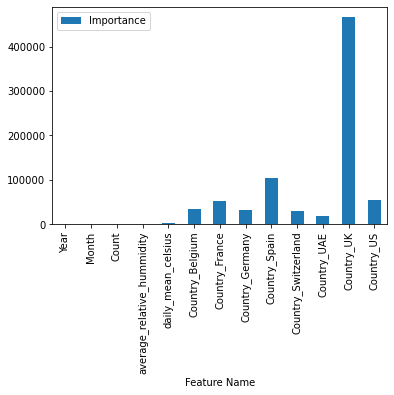

In [31]:
ax = Feature_Importance_DF.plot.bar(x='Feature Name', y='Importance', rot=0)
plt.xticks(rotation=90)
plt.show()